In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [14]:
ancestry2PCs = {}
line_count = 0
for line in open("./gnomad_ref.PC.predPop.tsv", "r"):
    parsed_line = line.strip("\n").split("\t")
    if line_count == 0:
        col2idx = {}
        for i in range(len(parsed_line)):
            col2idx[parsed_line[i]] = i
    else:
        ancestry = parsed_line[col2idx['predicted_pop']]
        if not ancestry2PCs.get(ancestry):
            ancestry2PCs[ancestry] = []
        ancestry2PCs[ancestry].append([float(parsed_line[col2idx['PC1']]), float(parsed_line[col2idx['PC2']])])
    line_count += 1
    

AFR.AMR 46649
SAS 6194
EUR 139444
EAS 7202


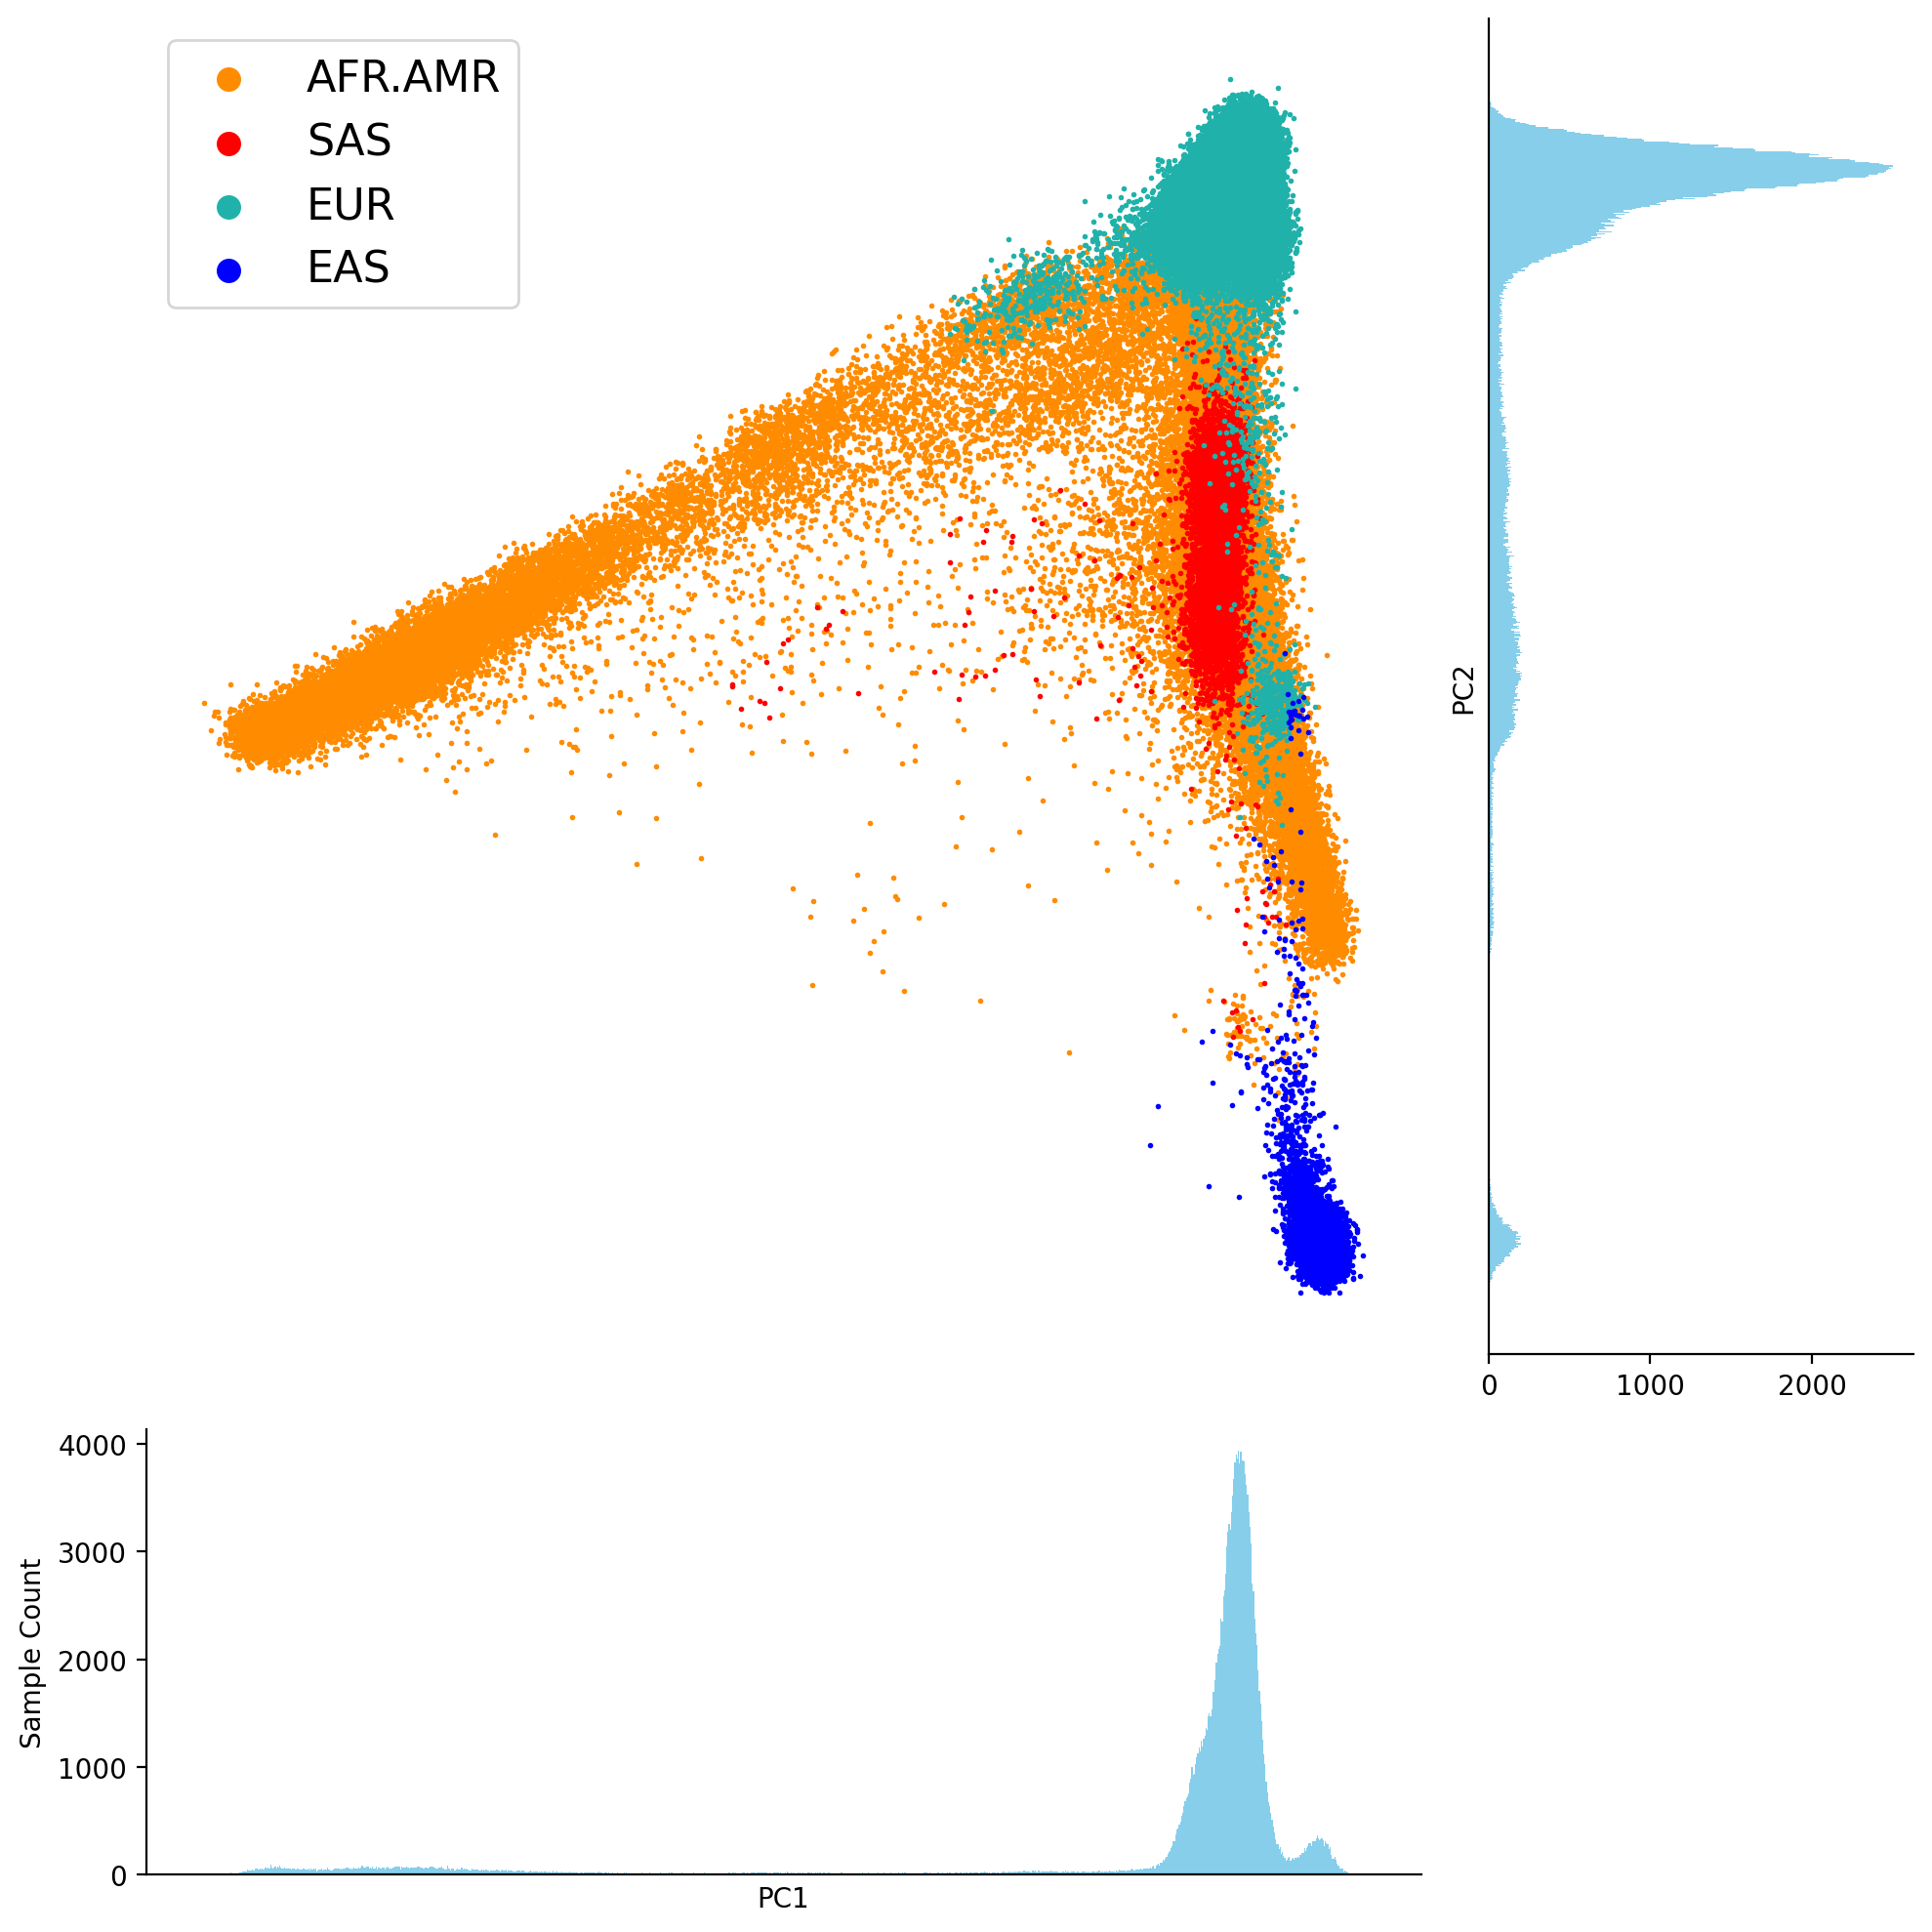

In [15]:
color_map = {
    'AFR.AMR': 'darkorange',
    'SAS': 'red',
    'EAS': 'blue',
    'EUR': 'lightseagreen',
}

fig = plt.figure(figsize=(10, 10), dpi=200)
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[3, 1])

# Top left plot (3 by 3 inches)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xticks([])
ax1.set_yticks([])
all_dots = []
for ancestry, PCs in ancestry2PCs.items():
    PC1s = [PC[0] for PC in PCs]
    PC2s = [PC[1] for PC in PCs]
    print(ancestry, len(ancestry2PCs[ancestry]))
    all_dots.append(ax1.scatter(PC1s, PC2s, color=color_map[ancestry], label=ancestry, s=1))
ax1.legend(markerscale=8, prop={'size': 16})
# ax1.legend(all_dots, color_map.keys(),loc='upper left', prop={'size': 16}, markerscale=8)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Top right plot (1 by 3 inches)
ax2 = fig.add_subplot(gs[0, 1])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticks([])
all_PC2s = []
for ancestry, PCs in ancestry2PCs.items():
    all_PC2s += [PC[1] for PC in PCs]
ax2.hist(all_PC2s, bins=1000, orientation="horizontal", color="skyblue")
ax2.set_ylabel("PC2")


# Bottom left plot (3 by 1 inches)
ax3 = fig.add_subplot(gs[1, 0])
ax3.set_xticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
all_PC1s = []
for ancestry, PCs in ancestry2PCs.items():
    all_PC1s += [PC[0] for PC in PCs]
ax3.hist(all_PC1s, bins=1000, orientation="vertical", color="skyblue")
ax3.set_xlabel("PC1")
ax3.set_ylabel("Sample Count")

plt.tight_layout()
plt.show()